
# MRFM_BrownianFit h5 Tests
last updated 01/16/2026 KLB

## Preliminaries

### import libraries

In [1]:
from MRFM_BrownianFit.LabVIEW_int import LVprocessing
import h5py
import os
from MRFM_BrownianFit.MCMC import MCMC

### read in the data from an h5 file 

(32 averages from 09/24/2025)


In [2]:
# set folder path for data if not in same folder as notebook
path = r".\\"
os.chdir(path)

# read h5 file for average power spectrum

file = h5py.File(r'brownian_k_20250924_145412_.h5', 'r')

temp = float(file['temp'][()])
n_avgs = int(file['n_avgs'][()])
freq = file['x'][:]
power = file['y'][:]

# check that data is read as expected
print( len(freq), freq.shape)
print(temp, n_avgs)


2000 (2000,)
294.5 32


## Run fit using MRFM_BrownianFit

### Use LVprocessing to initialize brownian_fit class

In [3]:
# set path to folder for saved plots and reports
path = r".\\example_outputs"

# set root name for plots and reports
name="brownian_k_20250924_145412_"

#call LVprocessing class
data = LVprocessing(n_avgs, temp, list(freq), list(power), name=name, path=path)


### do_fit()

c:\Users\Katri\miniconda3\envs\mrfm_emcee\lib\site-packages\uncertainties\core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


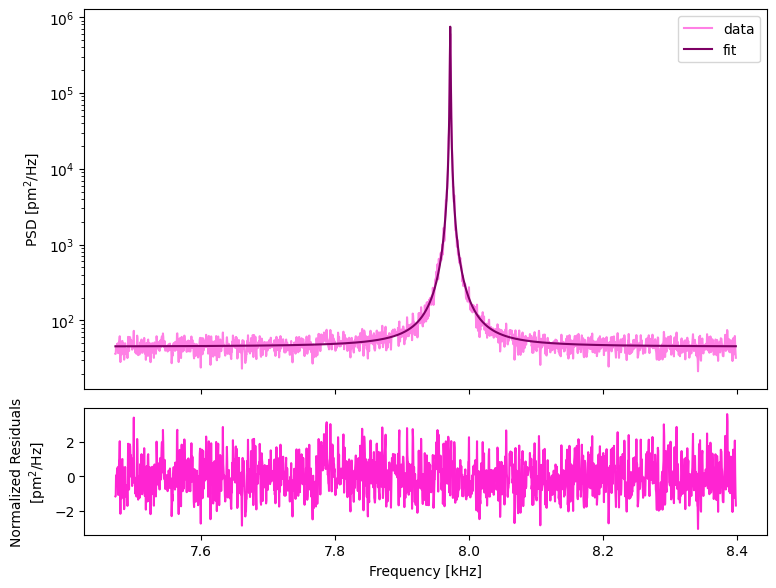

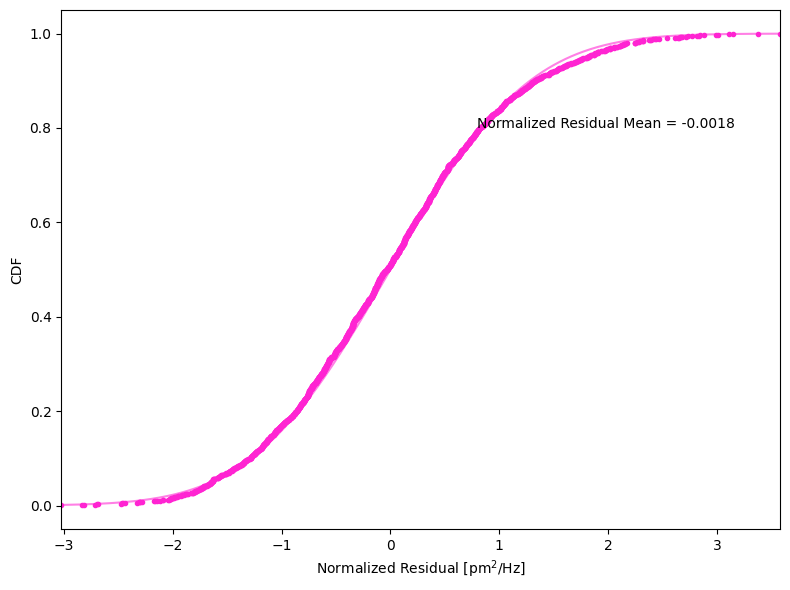

In [4]:
# run fitting function - this example will not generate the .tex report
data.do_fit()

# use brownian_fit functions to generate the fit plot and the residuals cdf
data.fit.plot_fit()
data.fit.residuals_CDF()

# print the fit summary
data.fit.result["leastsq"]

### plot_report()

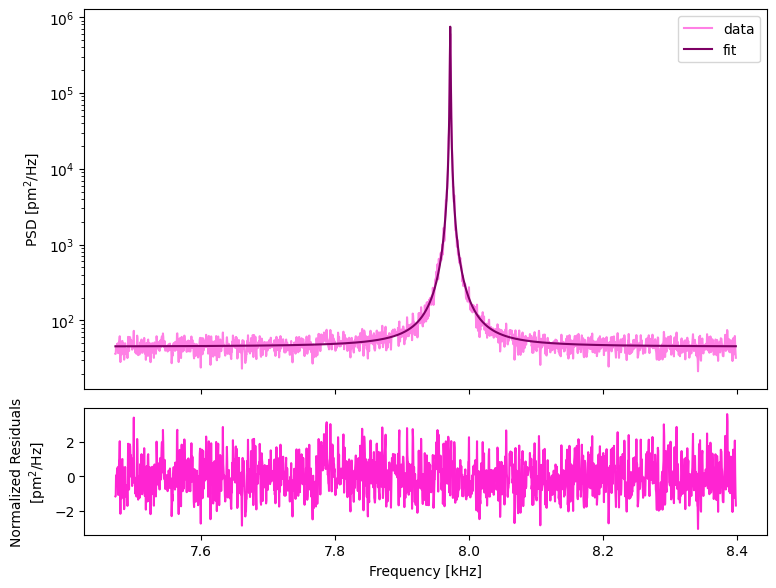

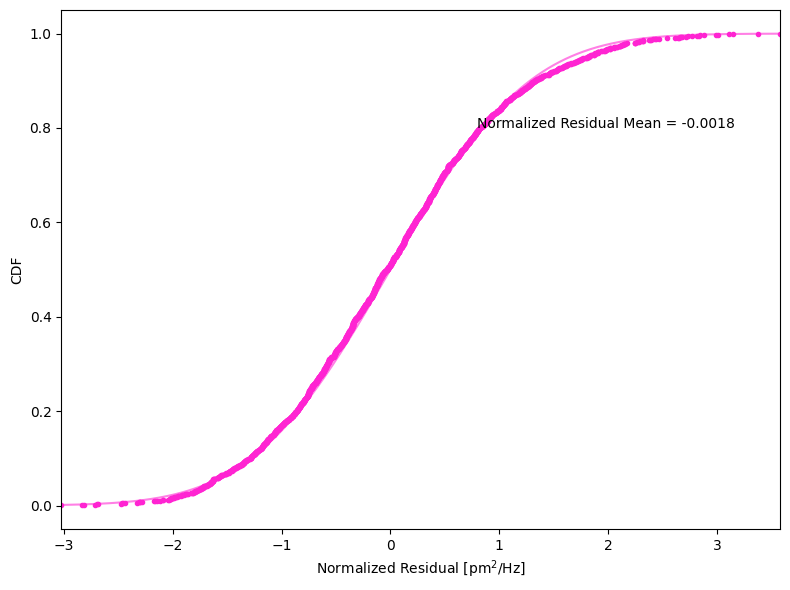

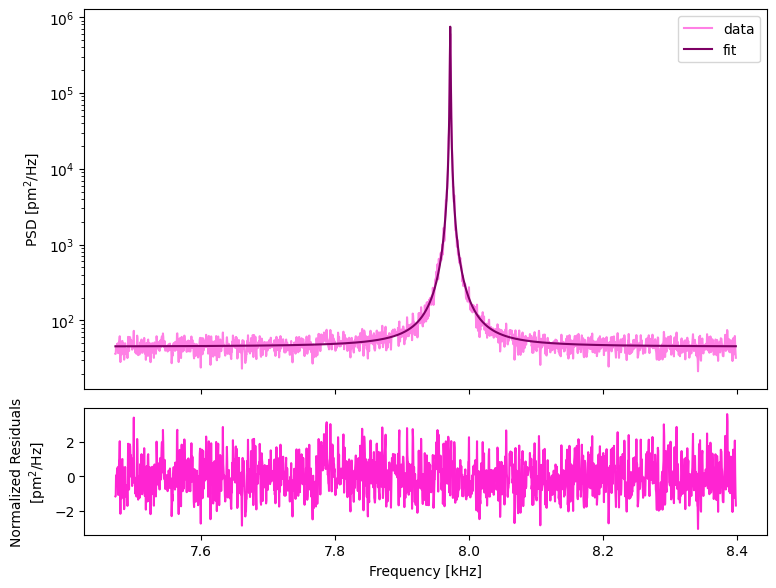

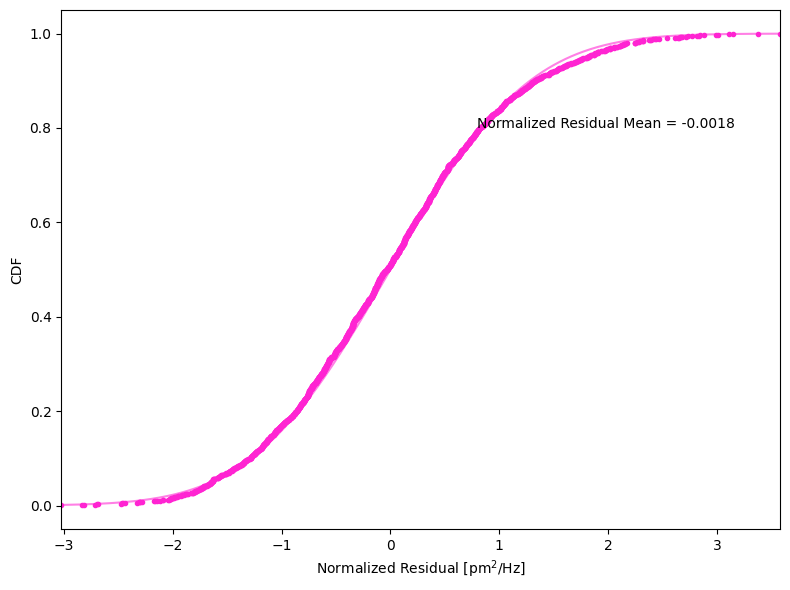

In [5]:
# run fitting function - this example will generate the .tex report
data.plot_report()

# use brownian_fit functions to generate the fit plot and the residuals cdf
data.fit.plot_fit()
data.fit.residuals_CDF()

# print the fit summary
data.fit.result["leastsq"]

## Use Bayesian methods to explore parameter distributions

### Maximum Log Likelihood Estimates

In [6]:
# find maximum log likelihood estimate
data.fit.max_likelihood()

print(data.fit.bayesian_result)

{'Gamma': 8.70705753052341e-12, 'tau0': 398.57225749259123, 'f0': 7.97248522442648, 'baseline': 45.154683158174436, 'message': 'Optimization terminated successfully.'}


### MCMC

Initializing class MCMC...
Running emcee sampler...


100%|██████████| 2000/2000 [00:08<00:00, 239.53it/s]


Plotting walkers...


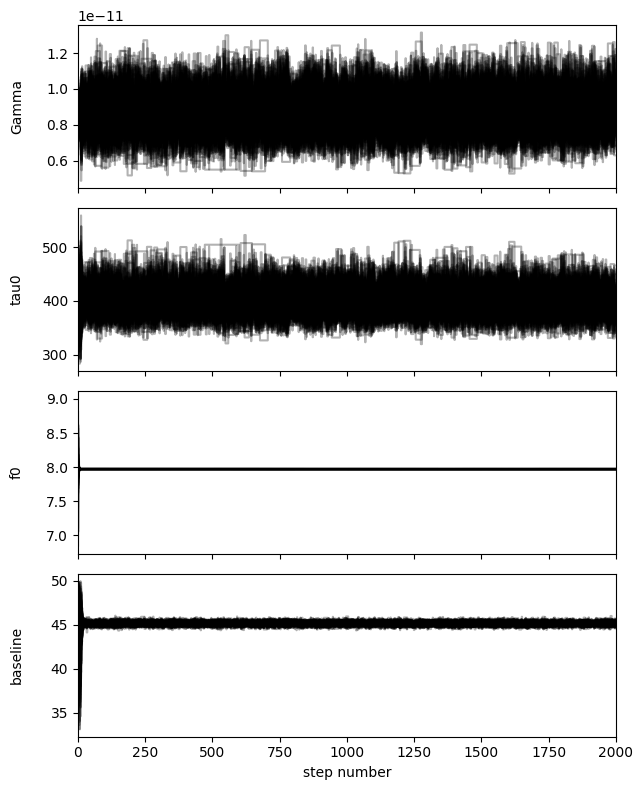

Calculating autocorrelation times...
[7.63970471 8.02844236 2.26147487 3.9979526 ]
Generating corner plots...
Calculating 95% credible intervals...
Gamma [N s/m]: [6.326e-12, 1.135e-11]
tau0 [ms]: [3.481e+02, 4.684e+02]
f0 [kHz]: [7.9724e+00, 7.9726e+00]
baseline [nm^2/Hz]: [4.473e+01, 4.559e+01]
Done.


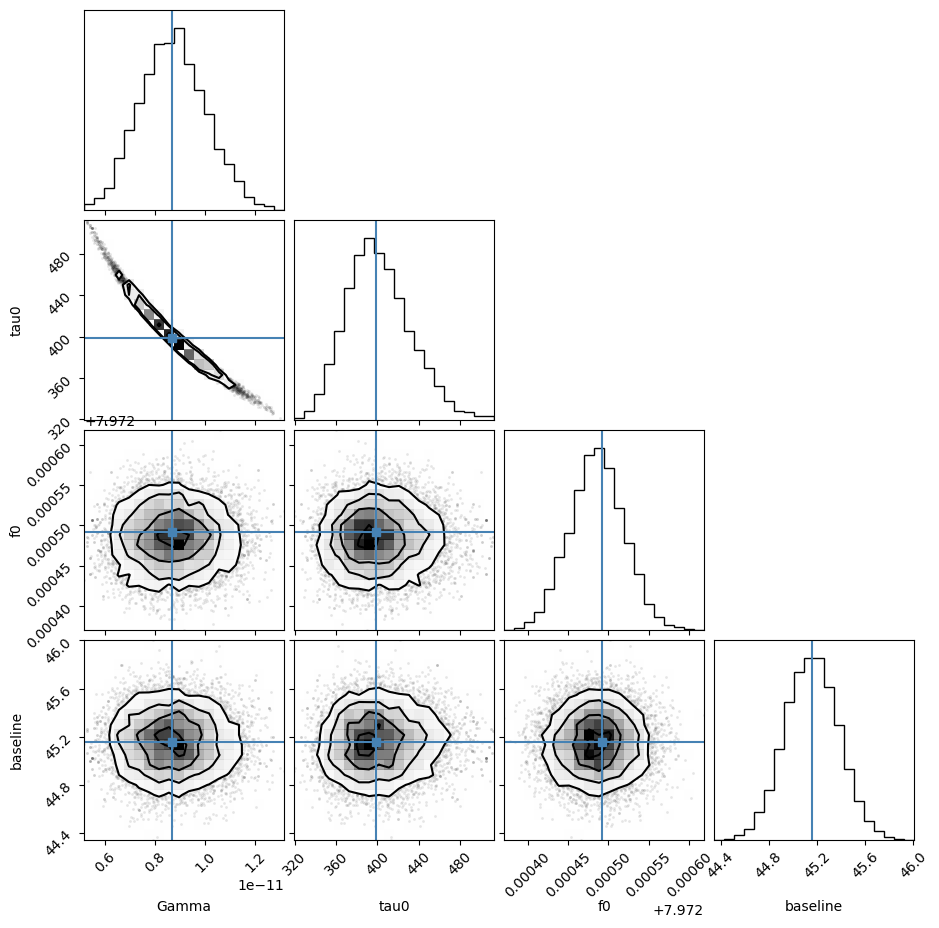

In [7]:
# define parameter bounds for Gamma, tau0, f0, and baseline - this will result in a uniform prior within these bounds
bounds = [(1e-16,1e-7),(1,5000),(4.5,11),(1,50)]

#initalize MCMC class
bayes_inf = MCMC(data.fit)

bayes_inf.run(param_bounds=bounds, n=95)

Other credible intervals: 68, 90

In [8]:
bayes_inf._credible_interval_68()

Calculating 68% credible intervals...
Gamma [N s/m]: [7.399e-12, 1.003e-11]
tau0 [ms]: [3.710e+02, 4.329e+02]
f0 [kHz]: [7.9725e+00, 7.9725e+00]
baseline [nm^2/Hz]: [4.494e+01, 4.538e+01]


In [9]:
bayes_inf._credible_interval_n(90)

Calculating 90% credible intervals...
Gamma [N s/m]: [6.641e-12, 1.095e-11]
tau0 [ms]: [3.547e+02, 4.567e+02]
f0 [kHz]: [7.9724e+00, 7.9725e+00]
baseline [nm^2/Hz]: [4.480e+01, 4.552e+01]


In [10]:
# if non int, should truncation to nearest int
bayes_inf._credible_interval_n(90.5)


Calculating 90% credible intervals...
Gamma [N s/m]: [6.641e-12, 1.095e-11]
tau0 [ms]: [3.547e+02, 4.567e+02]
f0 [kHz]: [7.9724e+00, 7.9725e+00]
baseline [nm^2/Hz]: [4.480e+01, 4.552e+01]
